In [181]:
### code taken from https://dev.to/m0nica/how-to-use-the-tmdb-api-to-find-films-with-the-highest-revenue-82p

import requests # to make TMDB API calls
import locale # to format currency as USD
locale.setlocale( locale.LC_ALL, '' )

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter # to format currency on charts axis
import seaborn as sns
import glob as glob
%matplotlib inline

api_key = '64bc8db1ac9143a7dbb820d7d420ac96'

scrape = False

In [182]:
if scrape == True:

    results = []

    for year in [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]:

        page_number = 1

        response = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' 
                                 +  api_key + '&page=' + str(page_number) + 
                                 '&with_original_language=en&primary_release_year=' + str(year) + '&with_release_type=3&with_runtime.gte=80')

        total_pages = response.json()['total_pages']
        # total_pages = 5

        results.extend(response.json()['results'])

        while page_number < total_pages:

            page_number += 1

            response = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' 
                                 +  api_key + '&page=' + str(page_number) + 
                                 '&with_original_language=en&primary_release_year=' + str(year) + '&with_release_type=3&with_runtime.gte=80')

            results.extend(response.json()['results'])
            
else: print('Scrape is set to False.')

Scrape is set to False.


In [183]:
import tmdbsimple as tmdb
tmdb.API_KEY = '64bc8db1ac9143a7dbb820d7d420ac96'

In [184]:
#Importing via CSV to avoid large scrape

df = pd.read_csv('2012-2019.csv')

In [185]:
df.head()

,Unnamed: 0,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,0,False,/kwUQFeFXOOpgloMgZaadhzkbTI4.jpg,"[878, 28, 12]",24428,en,The Avengers,When an unexpected enemy emerges and threatens...,151.095,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,4/25/2012,The Avengers,False,7.7,24245
1,1,False,/qkl57wzSFrpi2sRpoc2mZJbMuLP.jpg,"[12, 14, 18, 10749]",50620,en,The Twilight Saga: Breaking Dawn - Part 2,"After the birth of Renesmee, the Cullens gathe...",73.226,/jHE7WUf3FDod8vw3O3twh0JVZun.jpg,11/13/2012,The Twilight Saga: Breaking Dawn - Part 2,False,6.5,6978
2,2,False,/ziC23LkMYj8gToQQYQGWSGJCLNF.jpg,"[10751, 16, 35, 12]",82690,en,Wreck-It Ralph,"Wreck-It Ralph is the 9-foot-tall, 643-pound v...",70.213,/nsUAgWCxqbTD9wkKrv3nBGH2DVk.jpg,11/1/2012,Wreck-It Ralph,False,7.3,9689
3,3,False,/jIqxhCZ9aegfVtcBnR4Pn4EgL5o.jpg,"[10751, 35]",105965,en,Beverly Hills Chihuahua 3 - Viva La Fiesta!,When Papi &amp; co move into a luxurious hotel...,67.708,/fK3U8xulldz6lhMDuz3LFB7ngWH.jpg,9/3/2012,Beverly Hills Chihuahua 3 - Viva La Fiesta!,False,6.3,172
4,4,False,/eELGfMwh79VZbLCJEQ0XDOvrQ97.jpg,[35],57214,en,Project X,Three high school seniors throw a party to mak...,67.687,/lUPDGT3lyRrq8SvWuNWG2DP64bR.jpg,3/1/2012,Project X,False,6.7,4398


In [186]:
if scrape == True:

    df_ids = df['id']

    full_movies = []

    for idx in df_ids:
        movie = tmdb.Movies(idx)

        movie_dic = {}

        movie_dic.update(movie.info())

        movie.releases()
        for c in movie.countries:
            if c['iso_3166_1'] == 'US':
                certification = c['certification']
    #         else:
    #             certification = 'None'

        movie_dic.update({'mpaa_rating' : str(certification)})

        full_movies.append(movie_dic)

    df_full = pd.DataFrame(full_movies)

    df_full.to_csv('2012-2019 FULL.csv')
    
else: print('Scrape is set to False.')
    
#### 293471 & 437584 didn't work, make sure to write how i worked around

Scrape is set to False.


In [187]:
#Importing via CSV to avoid large scrape

df_full = pd.read_csv('2012-2019 FULL.csv')

df = df_full

print(df.shape)

df.head(3)

(18846, 27)


,Unnamed: 0,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,mpaa_rating
0,0,False,/kwUQFeFXOOpgloMgZaadhzkbTI4.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://marvel.com/avengers_movie/,24428,tt0848228,en,...,1518815515,143.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,False,7.7,24252,PG-13
1,1,False,/qkl57wzSFrpi2sRpoc2mZJbMuLP.jpg,"{'id': 33514, 'name': 'The Twilight Collection...",120000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,50620,tt1673434,en,...,829000000,115.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The epic finale that will live forever.,The Twilight Saga: Breaking Dawn - Part 2,False,6.5,6978,PG-13
2,2,False,/ziC23LkMYj8gToQQYQGWSGJCLNF.jpg,"{'id': 404825, 'name': 'Wreck-It Ralph Collect...",165000000,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",http://disney.go.com/wreck-it-ralph,82690,tt1772341,en,...,471222889,101.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The story of a regular guy just looking for a ...,Wreck-It Ralph,False,7.3,9690,PG


In [188]:
#https://datatofish.com/list-column-names-pandas-dataframe/

column_list = df.columns.values.tolist()

print(column_list)



['Unnamed: 0', 'adult', 'backdrop_path', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count', 'mpaa_rating']


In [189]:
# columns_to_drop = ['Unnamed: 0', 'adult', 'backdrop_path', 
#                    'belongs_to_collection', 'homepage',  
#                    'original_language',  
#                    'overview', 'poster_path', 
#                    'production_countries', 
#                    'spoken_languages', 
#                    'tagline', 'title', 'video']

# keep'budget''genres''id', 'imdb_id','original_title','popularity', 
# 'production_companies','release_date', 'revenue', 'runtime', 'status',
# 'vote_average', 
# 'vote_count', 'mpaa_rating'

In [190]:
# df.drop(columns=[columns_to_drop], inplace=True)

df = df[['release_date', 'original_title', 'id', 'budget', 'revenue', 'mpaa_rating', 
    'genres', 'popularity', 'vote_average', 'vote_count', 'runtime', 
    'production_companies']]

df.head(3)

,release_date,original_title,id,budget,revenue,mpaa_rating,genres,popularity,vote_average,vote_count,runtime,production_companies
0,4/25/2012,The Avengers,24428,220000000,1518815515,PG-13,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",151.095,7.7,24252,143.0,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ..."
1,11/13/2012,The Twilight Saga: Breaking Dawn - Part 2,50620,120000000,829000000,PG-13,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",73.226,6.5,6978,115.0,"[{'id': 491, 'logo_path': '/rUp0lLKa1pr4UsPm8f..."
2,11/1/2012,Wreck-It Ralph,82690,165000000,471222889,PG,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",70.213,7.3,9690,101.0,"[{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil..."


In [191]:
#filters - need to go back and do more cleaning, make it more pure, but this set is good to work with for now

df = df.loc[df['budget'] >= 1000000] #budget greater than $1mm
df = df.loc[df['revenue'] != 0] #revenue greater than 0, movies with zero indicate no 'real' release

print(df.shape)

df.head(3)

(1365, 12)


,release_date,original_title,id,budget,revenue,mpaa_rating,genres,popularity,vote_average,vote_count,runtime,production_companies
0,4/25/2012,The Avengers,24428,220000000,1518815515,PG-13,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",151.095,7.7,24252,143.0,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ..."
1,11/13/2012,The Twilight Saga: Breaking Dawn - Part 2,50620,120000000,829000000,PG-13,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",73.226,6.5,6978,115.0,"[{'id': 491, 'logo_path': '/rUp0lLKa1pr4UsPm8f..."
2,11/1/2012,Wreck-It Ralph,82690,165000000,471222889,PG,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",70.213,7.3,9690,101.0,"[{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil..."


# Budget

In [192]:
# #create function later
# # https://www.youtube.com/watch?v=ox_AHkeqNJ0&ab_channel=AbhishekAgarrwal

# df['production_budget'] = pd.to_numeric(df['production_budget'].replace('[^0-9\.-]', '', regex=True))
# df['domestic_gross'] = pd.to_numeric(df['domestic_gross'].replace('[^0-9\.-]', '', regex=True))
# df['worldwide_gross'] = pd.to_numeric(df['worldwide_gross'].replace('[^0-9\.-]', '', regex=True))

In [193]:
df.head(3)

,release_date,original_title,id,budget,revenue,mpaa_rating,genres,popularity,vote_average,vote_count,runtime,production_companies
0,4/25/2012,The Avengers,24428,220000000,1518815515,PG-13,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",151.095,7.7,24252,143.0,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ..."
1,11/13/2012,The Twilight Saga: Breaking Dawn - Part 2,50620,120000000,829000000,PG-13,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",73.226,6.5,6978,115.0,"[{'id': 491, 'logo_path': '/rUp0lLKa1pr4UsPm8f..."
2,11/1/2012,Wreck-It Ralph,82690,165000000,471222889,PG,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",70.213,7.3,9690,101.0,"[{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil..."


In [194]:
# insert column tip from: https://discuss.codecademy.com/t/can-we-add-a-new-column-at-a-specific-position-in-a-pandas-dataframe/355842/2

profit = df['revenue'] - df['budget']

df.insert (5, "profit", profit)

df.head(3)

,release_date,original_title,id,budget,revenue,profit,mpaa_rating,genres,popularity,vote_average,vote_count,runtime,production_companies
0,4/25/2012,The Avengers,24428,220000000,1518815515,1298815515,PG-13,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",151.095,7.7,24252,143.0,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ..."
1,11/13/2012,The Twilight Saga: Breaking Dawn - Part 2,50620,120000000,829000000,709000000,PG-13,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",73.226,6.5,6978,115.0,"[{'id': 491, 'logo_path': '/rUp0lLKa1pr4UsPm8f..."
2,11/1/2012,Wreck-It Ralph,82690,165000000,471222889,306222889,PG,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",70.213,7.3,9690,101.0,"[{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil..."


In [195]:
# https://stackoverflow.com/questions/56990755/how-to-create-a-boolean-column-depending-on-positive-or-negative-values-of-anoth      
df["successful"] = np.where(df["profit"] >= 0, 'Yes', 'No')
df

,release_date,original_title,id,budget,revenue,profit,mpaa_rating,genres,popularity,vote_average,vote_count,runtime,production_companies,successful
0,4/25/2012,The Avengers,24428,220000000,1518815515,1298815515,PG-13,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",151.095,7.7,24252,143.0,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...",Yes
1,11/13/2012,The Twilight Saga: Breaking Dawn - Part 2,50620,120000000,829000000,709000000,PG-13,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",73.226,6.5,6978,115.0,"[{'id': 491, 'logo_path': '/rUp0lLKa1pr4UsPm8f...",Yes
2,11/1/2012,Wreck-It Ralph,82690,165000000,471222889,306222889,PG,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",70.213,7.3,9690,101.0,"[{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...",Yes
4,3/1/2012,Project X,57214,12000000,100000000,88000000,R,"[{'id': 35, 'name': 'Comedy'}]",67.687,6.7,4399,88.0,"[{'id': 1885, 'logo_path': '/xlvoOZr4s1Pygosrw...",Yes
5,11/26/2012,The Hobbit: An Unexpected Journey,49051,250000000,1021103568,771103568,PG-13,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",61.052,7.3,14539,169.0,"[{'id': 21, 'logo_path': '/aOWKh4gkNrfFZ3Ep7n0...",Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17721,11/7/2019,The Personal History of David Copperfield,520900,15600000,11620337,-3979663,PG,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",15.076,6.7,211,119.0,"[{'id': 7493, 'logo_path': '/452FO4LcI6lA6bfgl...",No
17743,12/11/2019,Black Christmas,551808,5000000,18529730,13529730,NaN,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",13.840,4.8,312,92.0,"[{'id': 33, 'logo_path': '/8lvHyhjr8oUKOOy2dKX...",Yes
17746,12/13/2019,Seberg,510298,8000000,592565,-7407435,NaN,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",15.328,6.0,114,103.0,"[{'id': 7625, 'logo_path': '/kzq4ibnNeZrp00zpB...",No
18162,2/6/2019,Strike,573438,16800000,24743,-16775257,NaN,"[{'id': 10751, 'name': 'Family'}, {'id': 35, '...",5.421,6.1,15,95.0,"[{'id': 126493, 'logo_path': None, 'name': 'Gi...",No


In [196]:
df['successful'].unique()

array(['Yes', 'No'], dtype=object)

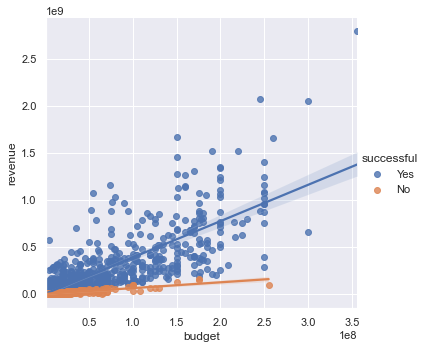

In [197]:
import seaborn as sns; sns.set_theme(color_codes=True)

sns.lmplot(x="budget", y="revenue", data=df, hue="successful")

plt.show()


# Takeaways

In [198]:
# response = requests.get('https://api.themoviedb.org/3/genre/movie/list?api_key=' + api_key + '&language=en-US')

# # Action          28
# # Adventure       12
# # Animation       16
# # Comedy          35
# # Crime           80
# # Documentary     99
# # Drama           18
# # Family          10751
# # Fantasy         14
# # History         36
# # Horror          27
# # Music           10402
# # Mystery         9648
# # Romance         10749
# # Science Fiction 878
# # TV Movie        10770
# # Thriller        53
# # War             10752
# # Western         37

# # print(response.json()['genres'])
# # print(response.json()['genres'][0])


# # case_list = {}
# # for entry in entries_list:
# #     case = {'key1': value, 'key2': value, 'key3':value }
# #     case_list.update(case)

# genre_dict = {}
# all_genres = []

# for genre in response.json()['genres']:
#     genre_add = {genre['id'] : genre['name']}
#     genre_dict.update(genre_add)
#     all_genres.append(genre['name'])
# print(genre_dict)
# # print(all_genres)

In [199]:
# response = requests.get('https://api.themoviedb.org/3/genre/movie/list?api_key=' + api_key + '&language=en-US')

# genre_dict = {}
# all_genres = []

# for genre in response.json()['genres']:
#     genre_add = {genre['id'] : genre['name']}
#     genre_dict.update(genre_add)
#     all_genres.append(genre['name'])
# print(genre_dict)


In [200]:
df.head()

,release_date,original_title,id,budget,revenue,profit,mpaa_rating,genres,popularity,vote_average,vote_count,runtime,production_companies,successful
0,4/25/2012,The Avengers,24428,220000000,1518815515,1298815515,PG-13,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",151.095,7.7,24252,143.0,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...",Yes
1,11/13/2012,The Twilight Saga: Breaking Dawn - Part 2,50620,120000000,829000000,709000000,PG-13,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",73.226,6.5,6978,115.0,"[{'id': 491, 'logo_path': '/rUp0lLKa1pr4UsPm8f...",Yes
2,11/1/2012,Wreck-It Ralph,82690,165000000,471222889,306222889,PG,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",70.213,7.3,9690,101.0,"[{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...",Yes
4,3/1/2012,Project X,57214,12000000,100000000,88000000,R,"[{'id': 35, 'name': 'Comedy'}]",67.687,6.7,4399,88.0,"[{'id': 1885, 'logo_path': '/xlvoOZr4s1Pygosrw...",Yes
5,11/26/2012,The Hobbit: An Unexpected Journey,49051,250000000,1021103568,771103568,PG-13,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",61.052,7.3,14539,169.0,"[{'id': 21, 'logo_path': '/aOWKh4gkNrfFZ3Ep7n0...",Yes


In [201]:
df_genre_list = []

for row in df['genres']:
    row = list(eval(row))
    row_genres = []
    for item in row:
        row_genres.append(item['name'])
    
    df_genre_list.append(row_genres)
    
df['genres'] = df_genre_list

df.head(10)

,release_date,original_title,id,budget,revenue,profit,mpaa_rating,genres,popularity,vote_average,vote_count,runtime,production_companies,successful
0,4/25/2012,The Avengers,24428,220000000,1518815515,1298815515,PG-13,"[Science Fiction, Action, Adventure]",151.095,7.7,24252,143.0,"[{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...",Yes
1,11/13/2012,The Twilight Saga: Breaking Dawn - Part 2,50620,120000000,829000000,709000000,PG-13,"[Adventure, Fantasy, Drama, Romance]",73.226,6.5,6978,115.0,"[{'id': 491, 'logo_path': '/rUp0lLKa1pr4UsPm8f...",Yes
2,11/1/2012,Wreck-It Ralph,82690,165000000,471222889,306222889,PG,"[Family, Animation, Comedy, Adventure]",70.213,7.3,9690,101.0,"[{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...",Yes
4,3/1/2012,Project X,57214,12000000,100000000,88000000,R,[Comedy],67.687,6.7,4399,88.0,"[{'id': 1885, 'logo_path': '/xlvoOZr4s1Pygosrw...",Yes
5,11/26/2012,The Hobbit: An Unexpected Journey,49051,250000000,1021103568,771103568,PG-13,"[Adventure, Fantasy, Action]",61.052,7.3,14539,169.0,"[{'id': 21, 'logo_path': '/aOWKh4gkNrfFZ3Ep7n0...",Yes
6,6/23/2012,The Amazing Spider-Man,1930,215000000,757930663,542930663,PG-13,"[Action, Adventure, Fantasy]",56.517,6.6,12673,136.0,"[{'id': 7505, 'logo_path': '/837VMM4wOkODc1idN...",Yes
7,6/26/2012,Ice Age: Continental Drift,57800,95000000,877244782,782244782,PG,"[Animation, Comedy, Adventure, Family]",56.442,6.3,5835,88.0,"[{'id': 9383, 'logo_path': '/ppeMh4iZJQUMm1nAj...",Yes
9,7/16/2012,The Dark Knight Rises,49026,250000000,1081041287,831041287,PG-13,"[Action, Crime, Drama, Thriller]",51.401,7.7,17495,165.0,"[{'id': 9996, 'logo_path': '/3tvBqYsBhxWeHlu62...",Yes
10,6/6/2012,Madagascar 3: Europe's Most Wanted,80321,145000000,746921274,601921274,PG,"[Animation, Family, Comedy, Adventure]",51.382,6.6,4562,93.0,"[{'id': 521, 'logo_path': '/kP7t6RwGz2AvvTkvnI...",Yes
11,6/21/2012,Brave,62177,185000000,538983207,353983207,PG,"[Animation, Adventure, Comedy, Family, Action,...",48.609,7.0,10466,93.0,"[{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...",Yes


In [145]:
# genre_list = []

# for row in genre_df['genre_ids']:
#     if row == '[]':
#         row = ['None']
#         genre_list.append(row)
#     else:
#         # https://stackoverflow.com/questions/19334374/python-converting-a-string-of-numbers-into-a-list-of-int
#         row = [int(s) for s in str(row).replace('[', '').replace(']', '').split(', ')] 
#         row = [genre_dict[x] for x in row]

        
#         genre_list.append(row)
# genre_list

KeyError: 'genre_ids'

In [205]:
genre_mean_df = df.explode('genres').groupby('genres').mean().round()
genre_median_df = df.explode('genres').groupby('genres').median().round()

,id,budget,revenue,profit,popularity,vote_average,vote_count,runtime
genres,,,,,,,,
Action,242281.0,83442070.0,275878015.0,192435944.0,54.0,6.0,4671.0,113.0
Adventure,240311.0,110242334.0,396482517.0,286240183.0,55.0,7.0,5549.0,113.0
Animation,248863.0,85701402.0,343391802.0,257690400.0,41.0,7.0,3422.0,95.0
Comedy,267944.0,42476736.0,147880136.0,105403400.0,30.0,6.0,2591.0,103.0
Crime,265654.0,33924267.0,94418412.0,60494144.0,31.0,6.0,2684.0,112.0
Documentary,296900.0,4318182.0,10747238.0,6429056.0,10.0,6.0,155.0,100.0
Drama,274215.0,29912086.0,87197238.0,57285152.0,27.0,7.0,2535.0,114.0
Family,260146.0,86611214.0,316636862.0,230025648.0,37.0,7.0,3233.0,98.0
Fantasy,243179.0,102828995.0,339264344.0,236435349.0,49.0,6.0,4904.0,112.0


In [253]:
# genre_mean_df = genre_mean_df.drop('id', axis=1)
# genre_median_df = genre_median_df.drop('id', axis=1)

# print(genre_mean_df.head(3))

# print(genre_median_df.head(3))

genre_median_df

,budget,revenue,profit,popularity,vote_average,vote_count,runtime,genre_name
genres,,,,,,,,
Action,60000000.0,133718711.0,68761661.0,36.0,6.0,3323.0,112.0,Action
Adventure,103000000.0,255825100.0,138622422.0,38.0,7.0,4052.0,110.0,Adventure
Animation,75000000.0,218349271.0,147401898.0,34.0,7.0,2096.0,93.0,Animation
Comedy,29000000.0,70611342.0,41390858.0,21.0,6.0,1498.0,101.0,Comedy
Crime,26610000.0,39289373.0,13479674.0,22.0,6.0,1614.0,111.0,Crime
Documentary,3000000.0,5892466.0,4892466.0,10.0,7.0,63.0,100.0,Documentary
Drama,18000000.0,30688247.0,9864930.0,18.0,7.0,1282.0,112.0,Drama
Family,75000000.0,196213478.0,99592154.0,30.0,7.0,2035.0,97.0,Family
Fantasy,90000000.0,208969096.0,125581173.0,37.0,6.0,3627.0,108.0,Fantasy


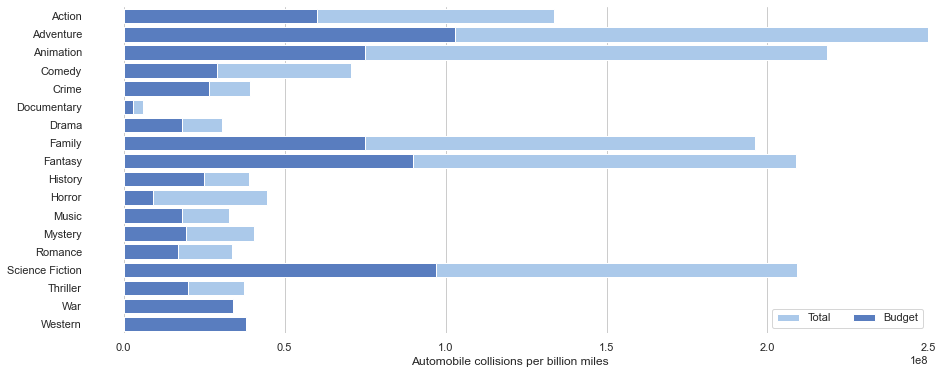

In [267]:
data = genre_median_df

# https://seaborn.pydata.org/examples/part_whole_bars.html
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 6))

# Plot the total crashes
sns.set_color_codes("pastel")

sns.barplot(x="revenue", y="genre_name", data=data,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="budget", y="genre_name", data=data,
            label="Budget", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(-10000000, 250000000), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

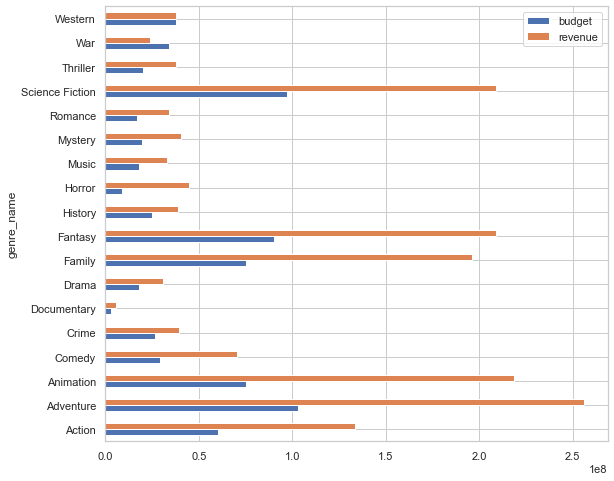

In [278]:
# https://www.delftstack.com/howto/matplotlib/pandas-plot-multiple-columns-on-bar-chart-matplotlib/

import pandas as pd 
import matplotlib.pyplot as plt 


df = genre_median_df
df.plot(x="genre_name", y=["budget", "revenue"], kind="barh",figsize=(9,8))
plt.show()

In [238]:
genre_mean_df['genre_name'] = genre_mean_df.index
genre_median_df['genre_name'] = genre_median_df.index

genre_mean_df

genre_mean_df.to_csv('genre_mean.csv')
genre_median_df.to_csv('genre_median.csv')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

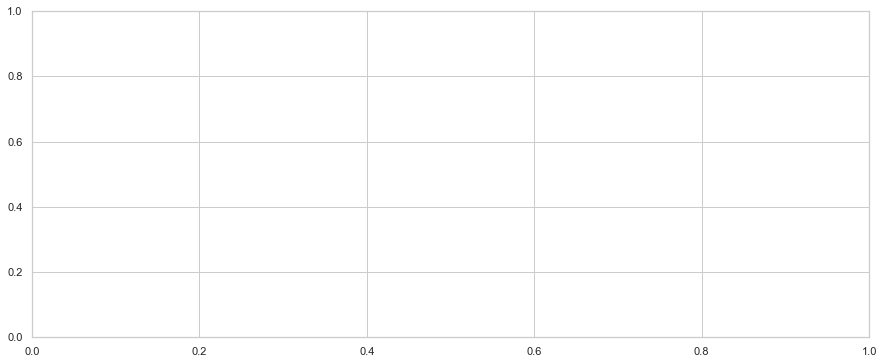

In [282]:
data = genre_median_df

# https://seaborn.pydata.org/examples/part_whole_bars.html
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 6))

# Plot the total crashes
sns.set_color_codes("pastel")

sns.barplot(x=["revenue", "revenue"], y="genre_name", data=data,
            label="Total", color="b")

# # Plot the crashes where alcohol was involved
# sns.set_color_codes("muted")
# sns.barplot(x="budget", y="genre_name", data=data,
#             label="Budget", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(-10000000, 250000000), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

In [ ]:
# https://futurestud.io/tutorials/matplotlib-stacked-bar-plots
# the first call is as usual
genre_name = all_genre_df['genre_name']
production_budget_avg = all_genre_df['production_budget_avg']
gross_profit_avg = all_genre_df['gross_profit_avg']

plt.figure(figsize = (15,5))
plt.barh(genre_name, production_budget_avg, color="#6c3376") #average profit

# the second one is special to create stacked bar plots
plt.barh(genre_name, gross_profit_avg, left=production_budget_avg, color="#f3e151")

plt.xlabel('Year')  
plt.ylabel('Number of futurestud.io Tutorials')

plt.show()  

In [ ]:
df['date'] = df['date'].astype("datetime64")
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [ ]:
#james in class

df['year'].plot(kind="hist")

sns.countplot(data = df, x = 'year')



In [223]:
genre_mean_df.index

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'Thriller', 'War', 'Western'],
      dtype='object', name='genres')

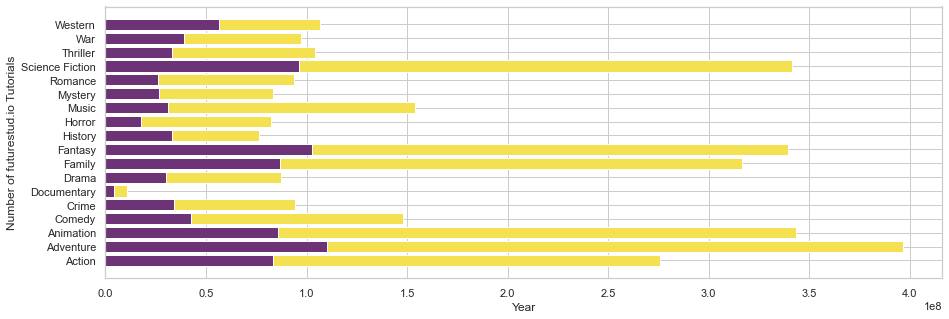

In [232]:
# https://futurestud.io/tutorials/matplotlib-stacked-bar-plots
# the first call is as usual
genre_name = genre_mean_df.index
production_budget_avg = genre_mean_df['budget']
gross_profit_avg = genre_mean_df['profit']

plt.figure(figsize = (15,5))
plt.barh(genre_name, production_budget_avg, color="#6c3376") #average profit

# the second one is special to create stacked bar plots
plt.barh(genre_name, gross_profit_avg, left=production_budget_avg, color="#f3e151")

plt.xlabel('Year')  
plt.ylabel('Number of futurestud.io Tutorials')

plt.show()  